In [6]:
import pandas as pd

wine_data = pd.read_csv("../data/winequality-white.csv", sep=r'\s*;\s*', skiprows=1, engine="python", names=["Fixed Acidity",
                                                                                                           "Volatile Acidity",
                                                                                                           "Citric Acid",
                                                                                                           "Residual Sugar",
                                                                                                           "Chlorides",
                                                                                                           "Free Sulfur Dioxide",
                                                                                                           "Total Sulfur Dioxide"
                                                                                                           "Density",
                                                                                                           "pH",
                                                                                                           "Sulphates",
                                                                                                           "Alcohol",
                                                                                                           "Quality"])

wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur DioxideDensity,pH,Sulphates,Alcohol,Quality
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
wine_data.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur DioxideDensity,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X = wine_data.drop("Quality", axis=1)
y = wine_data["Quality"]

X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import LinearSVC

model = LinearSVC(penalty="l1", dual=False, tol=0.0001)

model.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1')

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.5193877551020408

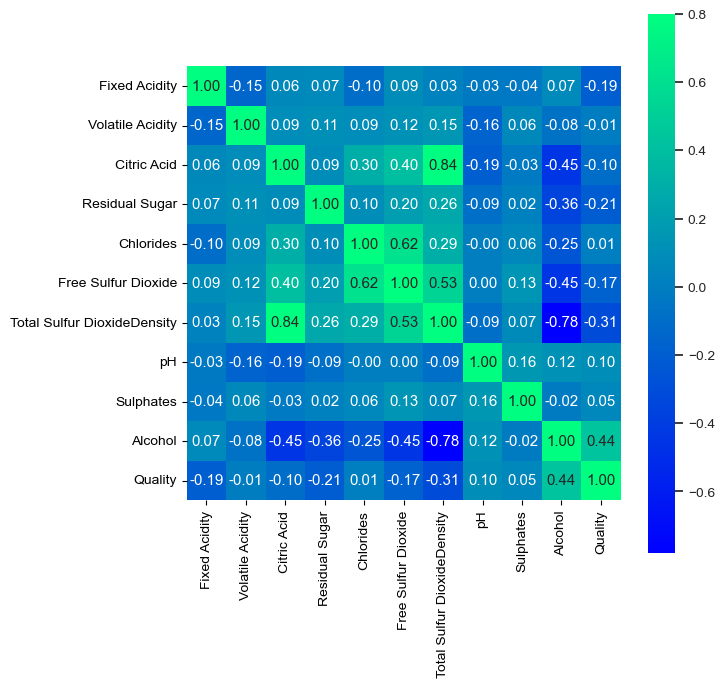

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()

f, ax = plt.subplots(figsize=[7,7])

sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="winter")
plt.show()

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, whiten=True)

X_reduced = pca.fit_transform(X)

In [32]:
pca.explained_variance_ratio_

array([0.31689369, 0.12856207, 0.11787045, 0.10183518, 0.09459791])

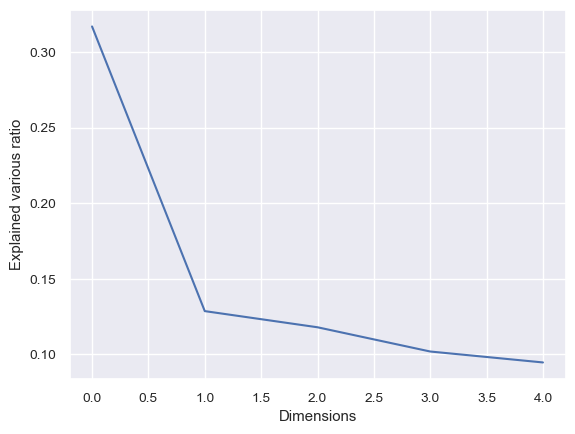

In [33]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Dimensions")
plt.ylabel("Explained various ratio")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1')

In [35]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.4530612244897959